# Python в инженерных расчетах. Лекция 02.
<hr style="border:2px solid gray">

План занятия:
1. Загрузить и визуализировать график силы деформирования, полученный при испытаниях плоского образца на растяжение;
2. Пересчитать график силы деформирования в график инженерных и истинных напряжений и деформаций;
3. Визуализировать график инженерных напряжений и деформаций;
4. Визуализировать график истинных напряжений и деформаций;
5. Определить предел прочности материала;
6. Определить равномерное удлинение материала;
7. Для дальнейшей работы по определению предела текучести материала и экстраполяции кривой упрочнения сохранить график истинное напряжение - истинная деформация в текстовы файл.

Данные перемещение-сила стали 08кп толщиной 1.5 мм хранятся по следующей локации: `../data/load_stroke_data.txt`.

Схема образца для проведения испытаний на растяжение:

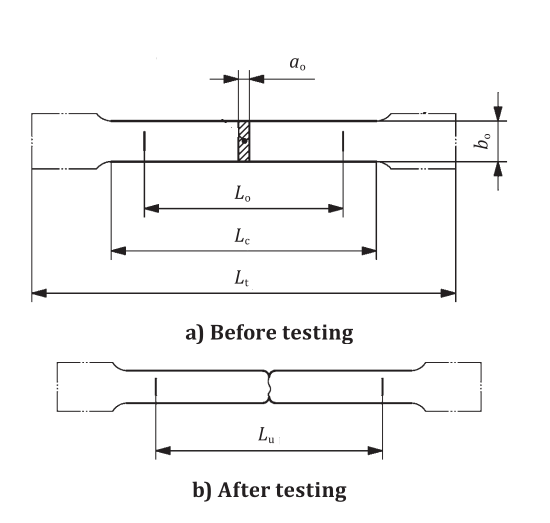


Схема графика напряжение-деформация для определения механических характеристик (предела прочности Rm и равномерного удлинения Ag):

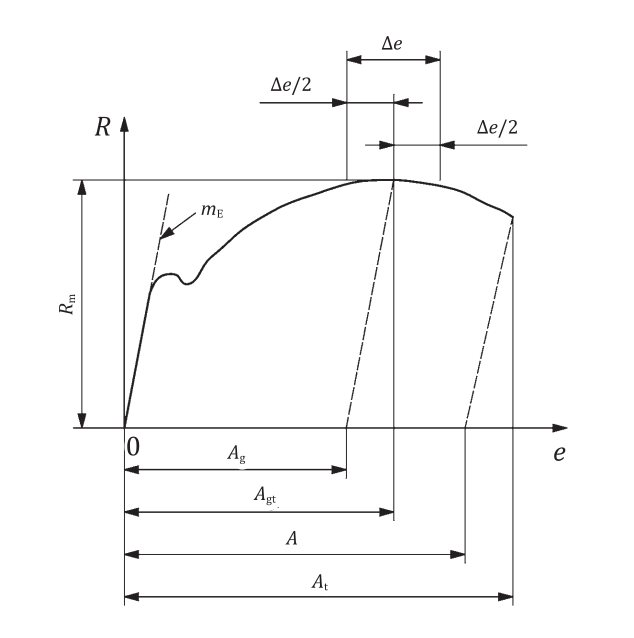


In [1]:
# импортируем библиотеку для визаулизации данных
import matplotlib.pyplot as plt
# импортируем библиотеку для базовых математических расчетов
import math

In [2]:
# Размеры образца, которые нам понадобятся позднее
b0 = 20 # ширина образца по ISO 6892-1:2019
L0 = 80 # начальная длина образца по ISO 6892-1:2019
a0 = 1.5 # тольщина образца по исходным данным

<br>
Для чтения данных из файла нам понадобятся две переменные типа list:<br> 
stroke - для хранения данных о перемещении;<br> 
load - для хранения данных о силе.
<br><br>

In [3]:
stroke = [] # пустой список для записи данных о перемещении
load = [] # пустой список для записи данных о силе

# открываем файл с данными
with open ('../data/load_stroke_data.txt', 'r') as file: # 'r' означает, что файл мы октрываем для чения
    for line in file:                                    # для каждой строки в файле мы выполняем следующие действия
        stroke_load = line.split('\t')                   # разделяем строку по табуляции (можно было ничего не писать в скобках 
                                                         # и разделение было бы по любым пробелам). Получаем временный список из двух чисел
        stroke.append(float(stroke_load[0]))             # первое число добавляем в список stroke
        load.append(float(stroke_load[1]))               # второе число в список load

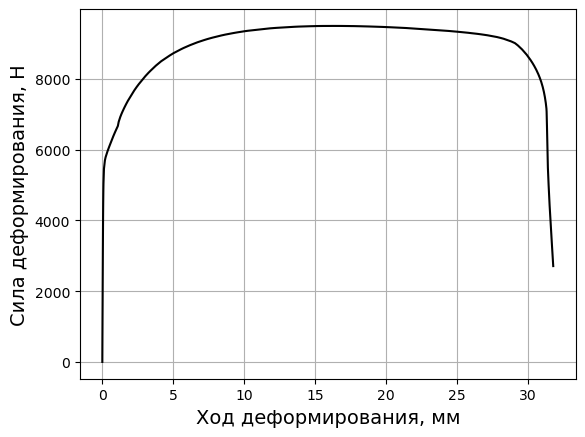

In [4]:
# визуализируем данные с помощью импортированной ранее библиотеки matplotlib

# создаем "базу" для графика
plt.plot (stroke, load, '-', color = 'black')
# Добавляем названия осей
plt.xlabel ('Ход деформирования, мм', fontsize = 14)
plt.ylabel ('Сила деформирования, Н', fontsize = 14)
# добавляем для красоты сетку
plt.grid()

<br><br><br>
Пересчет графика сила деформирования по ходу деформирвоания в график инженерное напряжение - инженерная деформация происходит по следующим формулам:
$$
\begin{flalign}
\sigma_{eng} = \frac{F}{A_0} \text {,}  \quad \epsilon_{eng} = \frac{\Delta L}{L_0}\times 100\% &&
\end{flalign}
$$
где:
$$
\begin{flalign}
\sigma_{eng} \text{ - инженерное напряжение течения, МПа} &&
\end{flalign}
$$
$$
\begin{flalign}
\epsilon_{eng} \text{ - инженерная деформация, \%} &&
\end{flalign}
$$



$$
\begin{flalign}
F \text{ - сила деформирования, Н} &&
\end{flalign}
$$

$$
\begin{flalign}
A_0 \text{ - площадь сечения образца,} \text{ мм}^2 &&
\end{flalign}
$$

$$
\begin{flalign}
\Delta L \text{ - ход деформирвоания, мм} &&
\end{flalign}
$$

$$
\begin{flalign}
L_0 \text{ - начальная длина образца, мм} &&
\end{flalign}
$$

In [5]:
# Расчет инженерного напряжения
A0 = b0*a0 # расчет площади поперечного сечения образца

sigma_eng = [] # пустой список куда будем записывать значения инженерного напряжения
for i in range (0, len(load)):
    sigma_eng.append(load[i]/A0)

In [6]:
# Расчет инженерной деформации
epsilon_eng = [] # пустой список куда будем записывать значения инженерной деформации
for i in range (0, len(stroke)):
    epsilon_eng.append((stroke[i]/L0)*100)

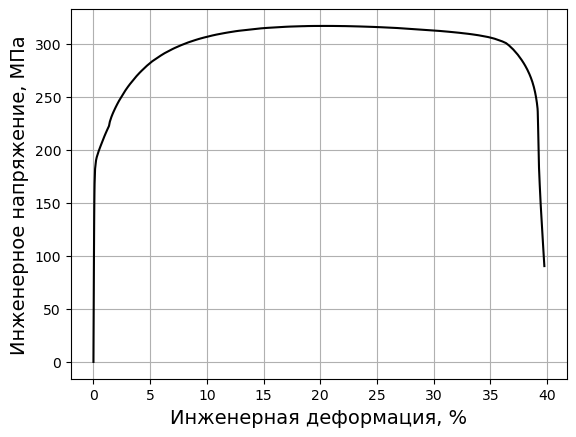

In [7]:
# Визуализируем результаты
# создаем "базу" для графика
plt.plot (epsilon_eng, sigma_eng, '-', color = 'black')
# Добавляем названия осей
plt.xlabel ('Инженерная деформация, %', fontsize = 14)
plt.ylabel ('Инженерное напряжение, МПа', fontsize = 14)
# добавляем для красоты сетку
plt.grid()

<br>
Расчет истинных напряжений и истинных деформаций будем проводить по следующим формулам:
$$
\begin{flalign}
\sigma_{\text{true}} = \sigma_{\text{eng}} \cdot (1 + \varepsilon_{\text{eng}}), \quad
\varepsilon_{\text{true}} = \ln(1 + \varepsilon_{\text{eng}}) &&
\end{flalign}
$$
<br>

In [8]:
# Расчет истинного напряжения и деформации
sigma_true = [] # пустой список куда будем записывать значения истинного напряжения
epsilon_true = [] # пустой список куда будем записывать значения истинной деформации
for i in range (0, len(sigma_eng)):
    sigma_true.append(sigma_eng[i]*(1+epsilon_eng[i]/100))
    epsilon_true.append(math.log(1+epsilon_eng[i]/100))

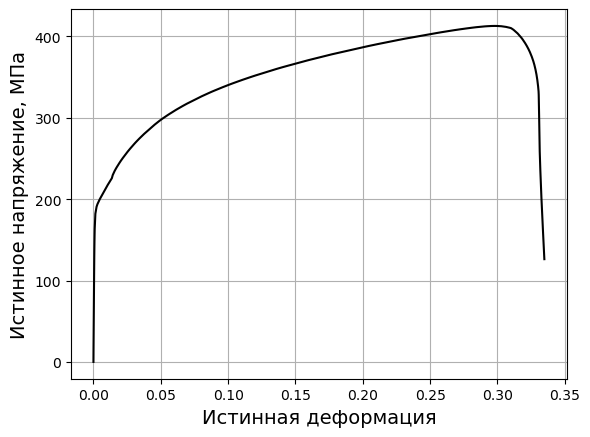

In [9]:
# Визуализируем результаты
# создаем "базу" для график
plt.plot (epsilon_true, sigma_true, '-', color = 'black')
# Добавляем названия осей
plt.xlabel ('Истинная деформация', fontsize = 14)
plt.ylabel ('Истинное напряжение, МПа', fontsize = 14)
# добавляем для красоты сетку
plt.grid()

<br>
Предел прочности материала (Rm) - наибольшее напряжение, которое способен выдержать образец при растяжении и после которого начинает образовываться шейка и начинается разрушеие образца. Таким образом задача определения предела прочности сводится к поиску максимального значения инженерного напряжения.
<br><br>

In [10]:
# Поиск предла прочности (максимального значения инженерного напряжения)
Rm = 0 # начальное значение переменной, которая будет хранить предел прочности
for i in range (1, len(sigma_eng)):
    if sigma_eng[i] > Rm:
        Rm = sigma_eng[i]
        i_m = i # номер строки в массиве данных, которому соответсвует предел прочности (эта переменная нам понадобится позже)
print (f'Предел прочности Rm = {round(Rm, 3)} МПа, при i = {i_m}')

Предел прочности Rm = 316.736 МПа, при i = 4162


<br>
Равномерное удлинение материала (Ag), также известное как относительное удлинение, это характеристика, показывающая, насколько материал может растягиваться до разрыва. Определяется по следующей формуле:
$$
\begin{flalign}
A_g = \varepsilon_{\text{eng}}\text{[i]} - \frac{\sigma_{\text{eng}}\text{[i]}}{E} &&
\end{flalign}
$$
где:
$$
\begin{flalign}
\text{i - номер строки в массиве данных, которому соответсвует предел прочности;} &&
\end{flalign}
$$
$$
\begin{flalign}
\text{E - модуль Юнга, МПа;} &&
\end{flalign}
$$
$$
\begin{flalign}
\sigma_{\text{eng}}\text{[i]} \text{ - соответсвует пределу  прочности Rm, МПа} &&
\end{flalign}
$$
$$
\begin{flalign}
\varepsilon_{\text{eng}}\text{[i]} \text{ - общая деформация (упругая + пластическая), соответсвует пределу прочности Rm} &&
\end{flalign}
$$
<br>


In [11]:
# Расчет равномерного удлинния
E = 210000 # модуль Юнга для стали принято брать 210 000 МПа
Ag = epsilon_eng[i_m] - (Rm/E)*100
print (f'Равномерное удлинение Ag = {round(Ag,3)}%')

Равномерное удлинение Ag = 20.434%


In [12]:
# Сохранение данных истинное напряжение - истинная деформация в текстовый файл
# Имя и путь к файлу
filename = "../data/true_stress_strain.txt"

# Записываем в файл, используя индексы
with open(filename, 'w') as f:              # открываем файл для записи
    for i in range(len(epsilon_true)):      # запускаем цикл от 0 до длины списка epsilon_true 
        eps = epsilon_true[i]               
        sig = sigma_true[i]                 
        f.write(f"{eps}\t{sig}\n")          # построчно записываем значения переменых epsilon_true[i] и sigma_true[i] в файл
                                            # здесь '\t' означает знак табуляции, '\n' - знак перехода на новую строку